In [49]:
import torch
arreglo = [[2,3,4], [1,5,6]]
tensor1 = torch.tensor(arreglo)
print(tensor1)

tensor([[2, 3, 4],
        [1, 5, 6]])


In [50]:
tensor1.device

device(type='cpu')

In [51]:
device = (
    "cuda" if torch.cuda.is_available()
    else "cpu"
)
print(f"Usando {device}")

Usando cpu


In [52]:
tensor1 = tensor1.to(device)
print(tensor1.device)

cpu


In [53]:
tensor1.shape

torch.Size([2, 3])

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

data_mnist = datasets.MNIST(
    root = "datos",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 501kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.79MB/s]


In [7]:
data_mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: datos
    Split: Train
    StandardTransform
Transform: ToTensor()

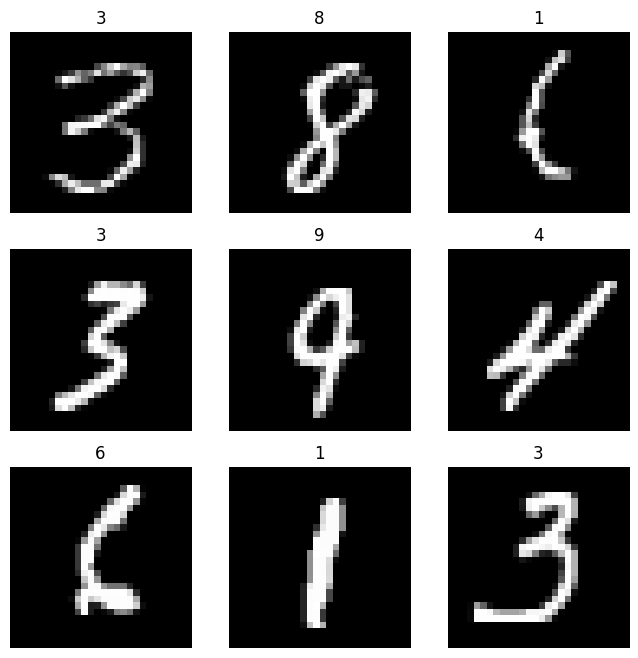

In [54]:
figure = plt.figure(figsize=(8, 8))
fils, cols = 3, 3

for i in range(1, cols * fils + 1):

    sample_idx = torch.randint(len(data_mnist), size=(1,)).item()

    img, label = data_mnist[sample_idx]

    figure.add_subplot(fils, cols, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [55]:
print(f'Tipo de dato imagen: {type(img)}')
print(f'Tamaño imagen: {img.shape}')
print(f'Mínimo y máximo imagen: {img.min()}, {img.max()}')
print(f'Tipo de dato categoría: {type(label)}')

Tipo de dato imagen: <class 'torch.Tensor'>
Tamaño imagen: torch.Size([1, 28, 28])
Mínimo y máximo imagen: 0.0, 1.0
Tipo de dato categoría: <class 'int'>


In [56]:
torch.manual_seed(123)

In [57]:
train, val, test = torch.utils.data.random_split(
    data_mnist, [0.8, 0.1, 0.1]
)

print(f'Tamaño set de entrenamiento: {len(train)}')
print(f'Tamaño set de validación: {len(val)}')
print(f'Tamaño set de prueba: {len(test)}')

print(f'Tipo de dato set "train": {type(train)}')
print(f'Tipo de dato set "val": {type(val)}')
print(f'Tipo de dato set "test": {type(test)}')

Tamaño set de entrenamiento: 48000
Tamaño set de validación: 6000
Tamaño set de prueba: 6000
Tipo de dato set "train": <class 'torch.utils.data.dataset.Subset'>
Tipo de dato set "val": <class 'torch.utils.data.dataset.Subset'>
Tipo de dato set "test": <class 'torch.utils.data.dataset.Subset'>


In [58]:
from torch import nn

class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()


        self.aplanar = nn.Flatten()
        self.red = nn.Sequential(
            nn.Linear(28*28, 15),
            nn.ReLU(),
            nn.Linear(15,10),
        )

    def forward(self, x):

        x = self.aplanar(x)
        logits = self.red(x)

        return logits

In [59]:
modelo = RedNeuronal().to(device)
print(modelo)

RedNeuronal(
  (aplanar): Flatten(start_dim=1, end_dim=-1)
  (red): Sequential(
    (0): Linear(in_features=784, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=10, bias=True)
  )
)


In [60]:
total_params = sum(p.numel() for p in modelo.parameters())
print("Número de parámetros a entrenar: ", total_params)

Número de parámetros a entrenar:  11935


In [61]:
img, lbl = train[200]
print(type(img))
print(type(lbl))

<class 'torch.Tensor'>
<class 'int'>


In [62]:
lbl = torch.tensor(lbl).reshape(1)
print(type(lbl))

<class 'torch.Tensor'>


In [63]:
img, lbl = img.to(device), lbl.to(device)

In [64]:
logits = modelo(img)
print(logits)

tensor([[ 0.1762, -0.0300,  0.1198, -0.0336, -0.0994,  0.0021, -0.1259,  0.0016,
          0.0412,  0.1990]], grad_fn=<AddmmBackward0>)


Logits: tensor([[ 0.1762, -0.0300,  0.1198, -0.0336, -0.0994,  0.0021, -0.1259,  0.0016,
          0.0412,  0.1990]], grad_fn=<AddmmBackward0>)
Categoría predicha: 9
Categoría real: 6


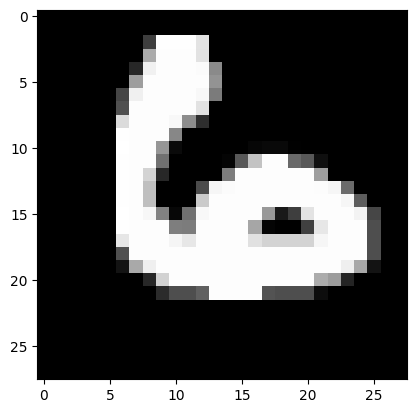

In [65]:
y_pred = logits.argmax(1)

plt.imshow(img.cpu().squeeze(), cmap="gray");

print(f'Logits: {logits}')
print(f'Categoría predicha: {y_pred[0]}')
print(f'Categoría real: {lbl[0]}')

In [66]:
fn_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(modelo.parameters(), lr=0.2)

In [67]:
loss = fn_perdida(logits, lbl)
print(loss)

tensor(2.4591, grad_fn=<NllLossBackward0>)


In [68]:
loss.backward()

In [69]:
optimizador.step()
optimizador.zero_grad()

In [70]:
logits = modelo(img)

loss = fn_perdida(logits, lbl)
loss.backward()
optimizador.step()
optimizador.zero_grad()

In [71]:
class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()

        self.aplanar = nn.Flatten()
        self.red = nn.Sequential(
            nn.Linear(28*28, 15),
            nn.ReLU(),
            nn.Linear(15,10),
        )

    def forward(self, x):

        x = self.aplanar(x)
        logits = self.red(x)

        return logits

modelo = RedNeuronal().to(device)

In [72]:
from torch.utils.data import DataLoader

TAM_LOTE = 1000


train_loader = DataLoader(
    dataset=train,
    batch_size=TAM_LOTE,
    shuffle=True
)

val_loader = DataLoader(
    dataset=val,
    batch_size=TAM_LOTE,
    shuffle=False
)

In [73]:

TASA_APRENDIZAJE = 0.1
EPOCHS = 10

In [74]:

fn_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(modelo.parameters(), lr=TASA_APRENDIZAJE)

In [75]:
def train_loop(dataloader, model, loss_fn, optimizer):

    train_size = len(dataloader.dataset)
    nlotes = len(dataloader)

    model.train()

    perdida_train, exactitud = 0, 0

    for nlote, (X, y) in enumerate(dataloader):

        X, y = X.to(device), y.to(device)

        logits = model(X)

        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        perdida_train += loss.item()
        exactitud += (logits.argmax(1)==y).type(torch.float).sum().item()

        if nlote % 10 == 0:
            ndatos = nlote*TAM_LOTE

            print(f"\tPérdida: {loss.item():>7f}  [{ndatos:>5d}/{train_size:>5d}]")

    perdida_train /= nlotes
    exactitud /= train_size


    print(f'\tExactitud/pérdida promedio:')
    print(f'\t\tEntrenamiento: {(100*exactitud):>0.1f}% / {perdida_train:>8f}')

In [76]:
def val_loop(dataloader, model, loss_fn):

    val_size = len(dataloader.dataset)
    nlotes = len(dataloader)

    model.eval()

    perdida_val, exactitud = 0, 0

    with torch.no_grad():
        for X, y in dataloader:

            X, y = X.to(device), y.to(device)

            logits = model(X)

            perdida_val += loss_fn(logits, y).item()
            exactitud += (logits.argmax(1) == y).type(torch.float).sum().item()

    perdida_val /= nlotes
    exactitud /= val_size

    print(f"\t\tValidación: {(100*exactitud):>0.1f}% / {perdida_val:>8f} \n")

In [77]:
for t in range(EPOCHS):
    print(f"Iteración {t+1}/{EPOCHS}\n-------------------------------")

    train_loop(train_loader, modelo, fn_perdida, optimizador)

    val_loop(val_loader, modelo, fn_perdida)
print("Listo, el modelo ha sido entrenado!")

Iteración 1/10
-------------------------------
	Pérdida: 2.306079  [    0/48000]
	Pérdida: 2.152023  [10000/48000]
	Pérdida: 1.934167  [20000/48000]
	Pérdida: 1.698753  [30000/48000]
	Pérdida: 1.459207  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 55.3% / 1.835414
		Validación: 71.7% / 1.283330 

Iteración 2/10
-------------------------------
	Pérdida: 1.239127  [    0/48000]
	Pérdida: 1.107620  [10000/48000]
	Pérdida: 0.918477  [20000/48000]
	Pérdida: 0.834119  [30000/48000]
	Pérdida: 0.806360  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 77.3% / 0.934018
		Validación: 80.6% / 0.722597 

Iteración 3/10
-------------------------------
	Pérdida: 0.747941  [    0/48000]
	Pérdida: 0.619071  [10000/48000]
	Pérdida: 0.619623  [20000/48000]
	Pérdida: 0.557980  [30000/48000]
	Pérdida: 0.580324  [40000/48000]
	Exactitud/pérdida promedio:
		Entrenamiento: 84.8% / 0.605026
		Validación: 85.9% / 0.546174 

Iteración 4/10
-------------------------------
	Pérdida: 0.56

In [80]:
def predecir(model, img):

    logits = model(img)
    y_pred = logits.argmax(1).item()

    plt.imshow(img.cpu().squeeze(), cmap="gray")
    plt.title(f'Categoría predicha: {y_pred}');

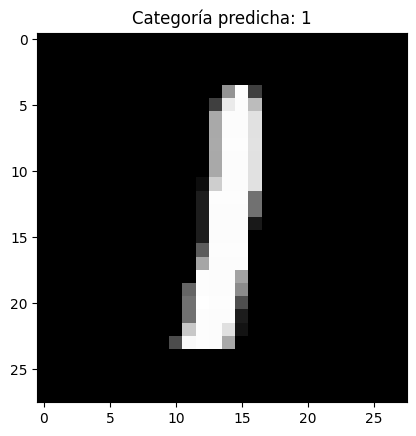

In [81]:
img, lbl = test[1235]

predecir(modelo, img)